# Marketing Case Study

This data is from a retail food company, serving nearly one million cusomuers a year. They sell products from five major categories: wine, rare meat products, exotic fruits, specially prepared fish, and sweet products.

This company has three sales channels for consumers to acquire products: physical stores, catalogues, and the company's website. The company has solid revenues and a healthy bottom line in the last three years, but the profit growth perspectives for the next three years are not as promising. One strategic initiative is to improve the performance of marketing activities with a focus on marketing campaigns.

## Data Exploration

A key objective of data exploration is to provide a better understanding of the characteristic features of respondents.

A second key objective of data exploration is to provide and describe a customer segmentation based on customer behaviours.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [39]:
# load data
with open("./data/marketing_data.csv", "r") as f:
    data = pd.read_csv(f)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [41]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### Data Types for Income and Dt_Customer features

The income feature name has extra spaces and was classified as an object type.
Looking at the csv file also shows that the values contain an extra space at the end also.

In [42]:
# function to clean up income columns
def clean_income(df):
    df.rename(columns={" Income ":"Income"}, inplace=True)
    df['Income'] = df['Income'].str.replace("$","").str.replace(",","")
    df['Income'] = df['Income'].astype(float)
    return df

clean_income(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [43]:
#data.iloc[262,:]

In [44]:
# how many missing values
print(data.Income.isnull().sum())

24


In [45]:
# change Dt_Customer column to a datetime column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')

In [46]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


This dataset contains 27 features and the target of response, which indicates whether or not the customer accepted the offer in the last campaign.

### Check for duplicate rows

A person who's signed up may have lost access to their account for some reason and wish to sign up again. Here, we'll search for duplicate rows using the year_birth, marital status, education, and income columns.

In [47]:
# if we drop the id column and then check for duplicates
data.drop(columns=['ID'])
data.duplicated().sum()

0

#### Fill NaN values in Income column

### Customer Profiles

This dataset contains various characteristics features of the customers, including:

Categorical
- Education (ordinal)
- Marital status (nominal)
- Country (nominal)

Numerical
- Year of birth (discrete)
- Dependents: Kidhome, Teenhome (discrete)
- Income (continuous)
- Dt_Customer (discrete)
- Complaints

date the customer enrolled with the company's loyalty program 

Start by graphing the two categorical features

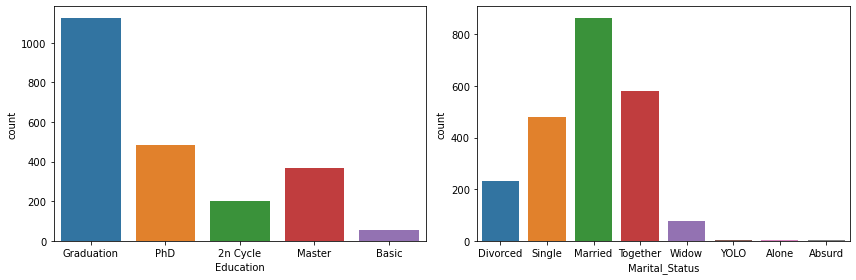

In [48]:
# Graph categorical features
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.countplot(x = "Education", data=data, ax=ax[0])
sns.countplot(x = "Marital_Status", data=data,  ax=ax[1])
plt.tight_layout()
plt.show()

There are some categories that could be grouped together in the marital status category.

In [49]:
def group_mstatus(df):
    '''Function to consolidate the single-equivalent marital status options into one.'''
    solo_status = ['YOLO', 'Alone', 'Absurd']
    df['Marital_Status'] = df['Marital_Status'].replace(solo_status, 'Single')
    return df

group_mstatus(data)
print(data.Marital_Status.unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow']


In [50]:
# group by education and marital status
df_plot = data.groupby(['Marital_Status', 'Education']).size().unstack()
ed_cols = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
df_plot = df_plot[ed_cols]
df_plot

Education,Basic,Graduation,Master,2n Cycle,PhD
Marital_Status,,,,,
Divorced,1,119,37,23,52
Married,20,433,138,81,192
Single,18,254,77,37,101
Together,14,286,106,57,117
Widow,1,35,12,5,24


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Together'),
  Text(4, 0, 'Widow')])

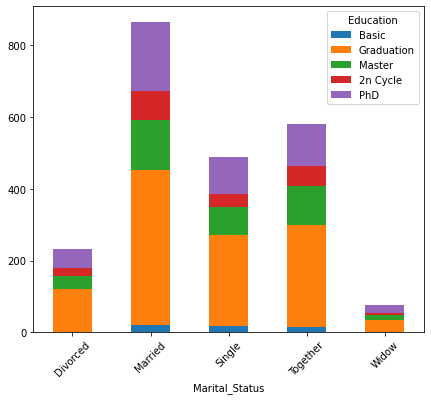

In [51]:
df_plot.plot(kind = 'bar', stacked=True, figsize=(7,6))
plt.xticks(rotation = 45)

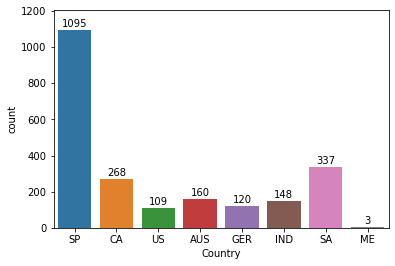

In [52]:
# plot country
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x = 'Country', data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.1)
plt.show()

#### Distribution of Continuous variables

In [53]:
data_num = data.select_dtypes(include=np.number)

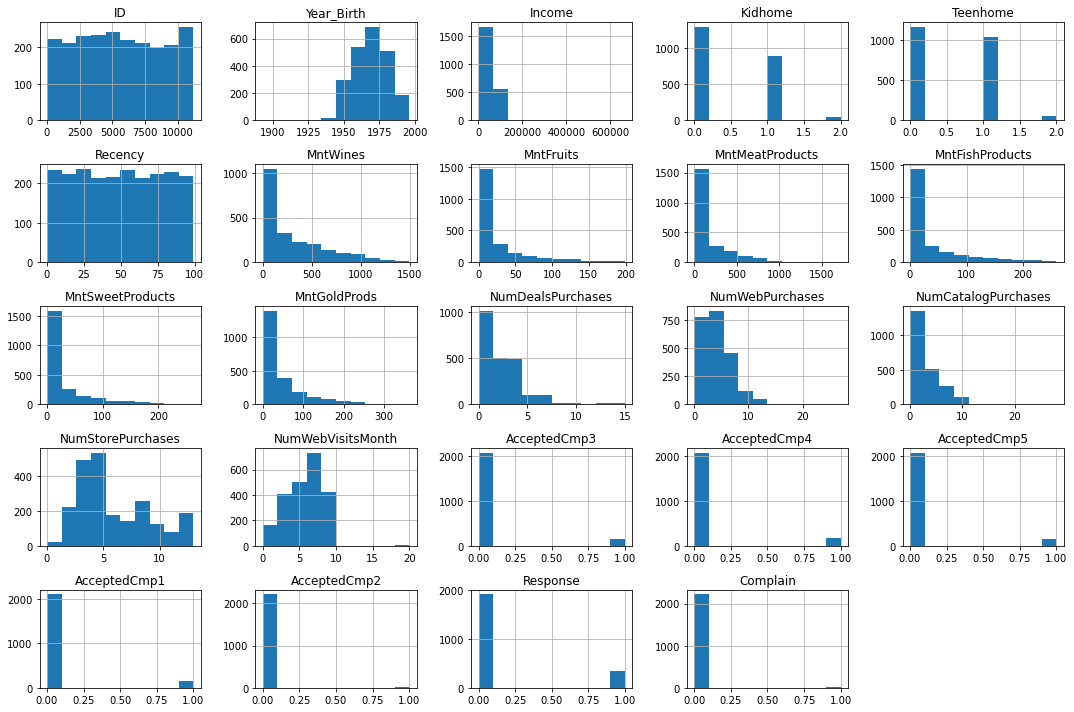

In [54]:
data_num.hist(figsize = (15, 10))
plt.tight_layout()
plt.show()

The year of birth and income appear to have some outliers. Let's have a closer look at these two features.

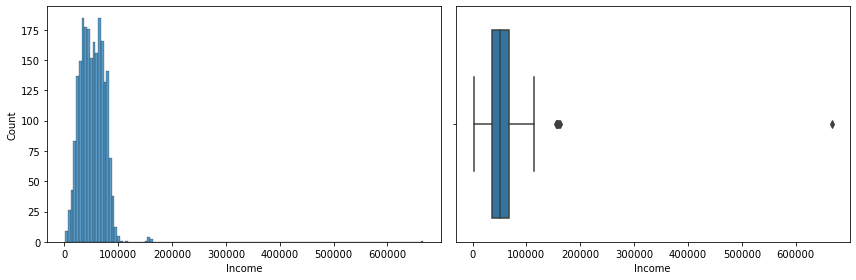

In [55]:
# plot income
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Income", data=data, ax=ax[0])
sns.boxplot(x="Income", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

In [56]:
data[data['Income'] > 160000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP


Although there are some values that are outliers based on this dataset, the values aren't unreasonable for income values and will be kept.

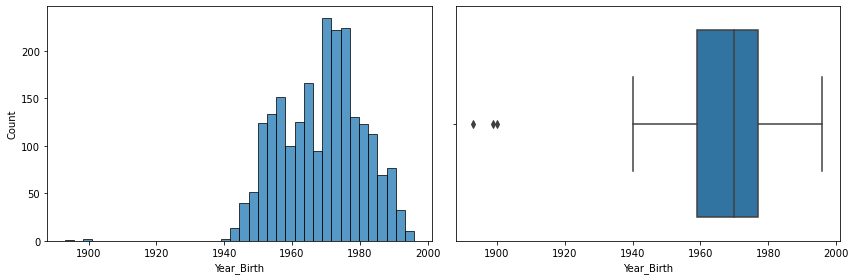

In [57]:
# plot Year_Birth
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Year_Birth", data=data, ax=ax[0])
sns.boxplot(x="Year_Birth", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

It seems unlikely that customers with a birth year around 1900s (an age of 100+ years old) will be both alive and buying their own groceries.

In [60]:
data.drop(data[data['Year_Birth'] <= 1900].index, inplace=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [61]:
# calculate age of customer
data['Age'] = 2022 - data['Year_Birth']
data['Age'].describe()

count    2237.000000
mean       53.098346
std        11.701917
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

In [68]:
# create dependents feature for kid and teen at home
data['Dependents'] = data['Kidhome'] + data['Teenhome']

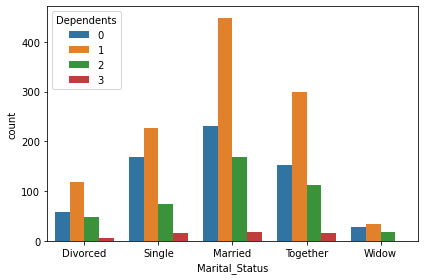

In [71]:
fig, ax = plt.subplots()
sns.countplot(x = 'Marital_Status', data=data, hue='Dependents')
plt.tight_layout()
plt.show()

#### Total Monetary Value

In [62]:
data['Mnt_Total'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] \
    + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Mnt_Total
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,52,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,61,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,64,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,55,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,33,91


#### Shoppers Frequency / Habits

In [65]:
def get_purchases_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Purchases' in col]

col_habits = get_purchases_cols(data)
col_habits.extend(['Recency', 'NumWebVisitsMonth'])
print(col_habits)

['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'NumWebVisitsMonth']


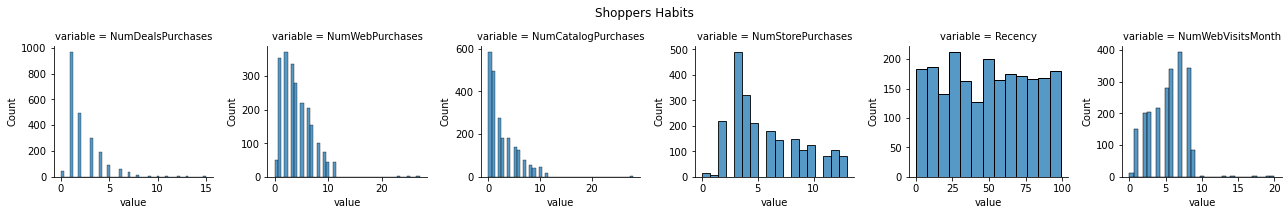

In [66]:
df_hab = data[col_habits]

# plot the mnt columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
graph = sns.FacetGrid(
    df_hab.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False)
graph.map(sns.histplot, "value")
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle("Shoppers Habits")
plt.show()

### Additional Feature Engineering

In [ ]:
# Build new data_seg df to use for segmentation
data_seg = pd.DataFrame()

# calculate how long customer has been part of loyalty program
data_seg['Length_customer'] = dt.date.today() - data['Dt_Customer']

In [ ]:
# one-hot-encode education
data_seg['Education'] = pd.get_dummies(data['Education'], prefix = 'edu')

# one-hot encode marital status
data_seg['Marital_Status'] = pd.get_dummies(data['Marital_Status'], prefix = 'mar')


In [ ]:
# add remaining columns
col_list = data.columns.to_list()
# print(col_list)
col_list = col_list[8:]
# col_list = col_list.remove("Response")
print(col_list)

df_seg = data_seg + data['mnt_columns']
['Income']

In [ ]:
# Check that all the columns are numeric
#all([pd.api.types.is_numeric_dtype(data[col]) for col in columns_for_clustering])

## Pre-Processing Data

Performing customer segmentation using machine learning requires some preprocessing of the data.
- First, if the data are skewed, then the data needs to be transformed
- Next, the data are centered and scaled using StandardScaler() method.

In [ ]:
#